<a href="https://colab.research.google.com/github/shortcipher3/information_theory_mackay/blob/master/Chapter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 2.16

### a)

#### sum

we simply count the number of ways to get the sums, for example to get 2 we must have only one possibility $(D_A=1, D_B=1)$, for 7 we have  six possibilities $(D_A=1, D_B=6), (D_A=2, D_B=5), (D_A=3, D_B=4), (D_A=4, D_B=3), (D_A=5, D_B=2), (D_A=6, D_B=1)$, this gives:

sum     | count
--------|-------
2       | 1
3       | 2
4       | 3
5       | 4
6       | 5
7       | 6
8       | 5
9       | 4
10      | 3
11      | 2
12      | 1

There are 36 total outcomes (six outcomes of $D_A$ and $D_B$, or the total of the sum counts), so the probability of an outcome is the count over 36.

#### absolute difference $|D_A - D_B|$

Using a similar counting strategy, we have six ways of getting 0: $(D_A=1, D_B=1), (D_A=2, D_B=2), (D_A=3, D_B=3), (D_A=4, D_B=4), (D_A=5, D_B=5), (D_A=6, D_B=6)$, there are ten ways of getting 1 $(D_A=2, D_B=1), (D_A=3, D_B=2), (D_A=4, D_B=3), (D_A=5, D_B=4), (D_A=6, D_B=5), (D_A=1, D_B=2), (D_A=2, D_B=3), (D_A=3, D_B=4), (D_A=4, D_B=5), (D_A=5, D_B=6)$, this gives:

$abs(D_A-D_B)$| count
--------|-------
0       |  6
1       | 10
2       |  8
3       |  6
4       |  4
5       |  2

There are 36 total outcomes (six outcomes of $D_A$ and $D_B$, or the total of the sum counts), so the probability of an outcome is the count over 36.

### b)

As we roll and sum more dice the outcome will approach the normal distribution by the central limit theorem. I will denote the dice roll sum $S_D = \sum_{x=0}^{99} D_x$ where $D_X \in \mathbb{Z} [1, 6]$ For 100 dice we will have:

minimum$(S_D) = \sum_{x=0}^{99} min(D_x) = 100 \times 1 = 100$

maximum$(S_D) = \sum_{x=0}^{99} max(D_x) = 100 \times 6 = 600$

mean$(S_D) = \sum_{x=0}^{99} \frac{1}{6} \sum_{n=1}^6 D_n = 100 \times \frac{1}{6} \sum_{n=1}^6 D_n = 100 \times \frac{21}{6} = 350$

std$(S_D) = \sqrt{ \frac{1}{6^{100}} \sum_{x=0}^{99} \sum_{n=1}^6 \left( D_n - \bar{D_n} \right)^2 } = \sqrt{ \frac{1}{6^{100}} \sum_{x=0}^{99} 2(.5)^2 + 2 (1.5)^2 + 2(2.5)^2 }$

A sketch of the distribution is in the next cell, based on the fact that the pmf of the sum of two random variables is the convolution of the pmfs, and using the minimum to produce the offset.

### c)
Dice can be labeled: ${0,1,2,3,4,5,6}$, but must have a uniform distribution over the integers 1-12. Without loss of generality we can say:

minimum$(D_S) = 1 \rightarrow 0 \in D_A, 1 \in D_B, 0 \notin D_B$

maximum$(D_S) = 12 \rightarrow 6 \in D_A, 6 \in D_B$

There are 36 possible die roll outcomes, and so we need 3 ways to produce each of the desired sum outcome. Suppose $D_B$ has only one face labeled 1, then $D_A$ must have three faces labeled 0. If $D_B$ has only one face labeled 6, then $D_A$ must have three faces labeled 6. Now we have six faces for $D_A$, $D_A \in {0, 0, 0, 6, 6, 6}$, which would give $D_B \in {1, 2, 3, 4, 5, 6}$ we see that the number of sum outcomes is 12 ($|D_A| \times |D_B|$) and that the outcomes are uniform.

### d)
A trivial solution is to label 99 dice so that all faces on each die are constant, the final die can be labeled with any choice of uniform distribution.

<BarContainer object of 501 artists>

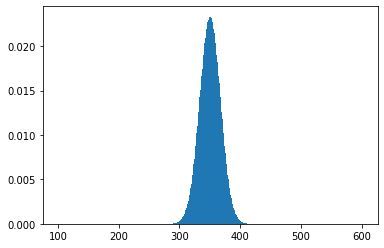

In [5]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

num_dice = 100
num_faces = 6
sum_min_val = num_dice * 1
pmf_die = np.ones((num_faces,))
pmf_sum = np.ones((1,))

for n in range(num_dice):
  pmf_sum = np.convolve(pmf_sum, pmf_die)

xs = np.arange(len(pmf_sum)) + sum_min_val
plt.bar(xs, pmf_sum/(num_faces**num_dice), width=1, align='edge')

## Exercise 2.18

Bayes Theorem states

$P(x, y) = P(x) P(y|x) = P(y) P(x|y)$

$P(x=0) P(y|x=0) = P(y) P(x=0|y)$

$P(x=1) P(y|x=1) = P(y) P(x=1|y)$

$\frac{P(y)P(x=1|y)}{P(y)P(x=0|y)} = \frac{P(x=1) P(y|x=1)}{P(x=0) P(y|x=0)}$

$\frac{P(x=1|y)}{P(x=0|y)} = \frac{P(x=1) P(y|x=1)}{P(x=0) P(y|x=0)}$

$log\frac{P(x=1|y)}{P(x=0|y)} = log\frac{P(x=1) P(y|x=1)}{P(x=0) P(y|x=0)}$

$log\frac{P(x=1|y)}{P(x=0|y)} = log\frac{P(y|x=1)}{P(y|x=0)} + log \frac{P(x=1)}{P(x=0)}$

## Exercise 2.21
$E[f(x)] = \sum_x p(x) f(x) = p_a f(a) + p(b) f(b) + p(c) f(c) = 0.1 \times 10 + 0.2 \times 5 + 0.7 \times \frac{10}{7} = 1 + 1 + 1 = 3$
$E\left[\frac{1}{P(x)}\right] = \sum_x p(x) \frac{1}{p(x)} = \sum_x 1 = 1 + 1 + 1 = 3$


## Exercise 2.22
$E\left[\frac{1}{P(x)}\right] = \sum_x p(x) \frac{1}{p(x)} = \sum_x 1 $ which is the number of non-zero probability values x can take, or more succinctly $|A_x|$


## Exercise 2.23
$E[g(x)] = \sum_x p(x) g(x) = p_a g(a) + p(b) g(b) + p(c) g(c) = 0.1 \times 0 + 0.2 \times 1 + 0.7 \times 0 = 0 + 0.2 + 0 = 0.2$


## Exercise 2.25

Prove $H(x) \le log|A_x|$ with equality iff $p_i = \frac{1}{|A_x|}$

We have the following constraint: $\sum_{i=0}^{N-1} p_i = 1$

$H(i) = - \sum_i p_i log( p_i)$

From the text:

Jensen's Inequality states:

$E[f(x)] \ge f(E[x])$

$x log (x)$ is convex for $x>0$

So, we choose $f(x) = x log x$ where $x \in [0,1]$ and $\sum_i x_i = 1$

$E[x] = \frac{1}{|A_x|} \sum_i x_i = \frac{1}{|A_x|}$

$f(E[x]) = \frac{1}{|A_x|} log \frac{1}{|A_x|}$

$E[f(x)] = \frac{1}{|A_x|} \sum_x x log(x) \ge \frac{1}{|A_x|} log \frac{1}{|A_x|}$

$E[f(x)] = \sum_x x log(x) \ge log \frac{1}{|A_x|}$

$E[f(x)] = \sum_x x log(x) \ge - log |A_x|$

$E[f(x)] = - \sum_x x log(x) \le log |A_x|$

$E[f(x)] = H(x) \le log |A_x|$

Since our function $f(x) = x log(x)$ is convex, it has a unique minimum, we check the boundaries, where $x_i=1, x_{j \ne i} = 0$, which gives 0 (since we define $0 log 0$ as 0. We observe that $x_i = \frac{1}{|A_x|}$ achieves the desired value and is the minimum. (This is the maximum when we negate our function, so the maximum entropy).


## Exercise 2.26

Prove $D_{KL}(P||Q) \ge 0$ with equality iff $P=Q$

From the text:
$D_{KL}(P||Q) = P(x) log \left( \frac{P(x)}{Q(x)} \right)$

Jensen's Inequality:

$E[f(x)] \ge f(E[x])$
